## Task 2 (Natural Language Processing (NLP) - Text Classification

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.stem import PorterStemmer

#### Load Data

In [ ]:
data = pd.read_csv('3) Sentiment dataset.csv')
print(data.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

#### Preprocessing

In [ ]:
stemmer = PorterStemmer()

#### Removing Stopwords

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_texts = []

for text in data['Text']:
  text = str(text).lower()
  text = text.translate(str.maketrans('','', string.punctuation))
  tokens = text.split()
  tokens = [word for word in tokens if word not in stopwords]
  tokens = [stemmer.stem(word) for word in tokens]
  clean_texts.append(" ".join(tokens))

data['Clean_text'] = clean_texts

#### Label encoder

In [ ]:
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

#### Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Clean_text'], data['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_train

,Clean_text
683,reflect challeng school year feel bit overwhel...
250,stand tall proud oak branch achiev reach towar...
336,calm found rhythm raindrop windowpan
260,unveil layer curios labyrinth question lead tr...
439,heart ruin remnant shatter dream scatter wind
...,...
71,confus cloud mind navig decis
106,kind wit today restor faith human
270,empathi lantern wander dark alley sorrow illum...
435,emot exhaust weight world crush weari shoulder


#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Train Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

#### Train Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)

#### Evaluate Model

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))

evaluate_model("Naive Bayes", y_test, nb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)


=== Naive Bayes ===
Accuracy: 0.11564625850340136

=== Logistic Regression ===
Accuracy: 0.09523809523809523


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.3128205128205128
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### Why the accuracy score very low

The low accuracy can be caused by data imbalance. It can be seen that the types of classes in the sentiment column are too many and uneven in number. Thus, it can cause bias during the model building process.

Some techniques that can be used to increase accuracy, such as:
*   Use **stratified split**
*   Apply balancing technique (undersampling, oversampling, or SMOTE)



In [ ]:
print(data['Sentiment'].value_counts())
print(data['Sentiment'].unique())

Sentiment
positive                45
joy                     44
excitement              37
contentment             19
neutral                 18
                        ..
celestial wonder         1
nature's beauty          1
thrilling journey        1
whispers of the past     1
relief                   1
Name: count, Length: 191, dtype: int64
['positive' 'negative' 'neutral' 'anger' 'fear' 'sadness' 'disgust'
 'happiness' 'joy' 'love' 'amusement' 'enjoyment' 'admiration' 'affection'
 'awe' 'disappointed' 'surprise' 'acceptance' 'adoration' 'anticipation'
 'bitter' 'calmness' 'confusion' 'excitement' 'kind' 'pride' 'shame'
 'elation' 'euphoria' 'contentment' 'serenity' 'gratitude' 'hope'
 'empowerment' 'compassion' 'tenderness' 'arousal' 'enthusiasm'
 'fulfillment' 'reverence' 'despair' 'grief' 'loneliness' 'jealousy'
 'resentment' 'frustration' 'boredom' 'anxiety' 'intimidation'
 'helplessness' 'envy' 'regret' 'curiosity' 'indifference' 'numbness'
 'melancholy' 'nostalgia' 'ambivalenc

<ipython-input-31-364154283357>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Sentiment', order=sentiment_counts.index, palette=colors)


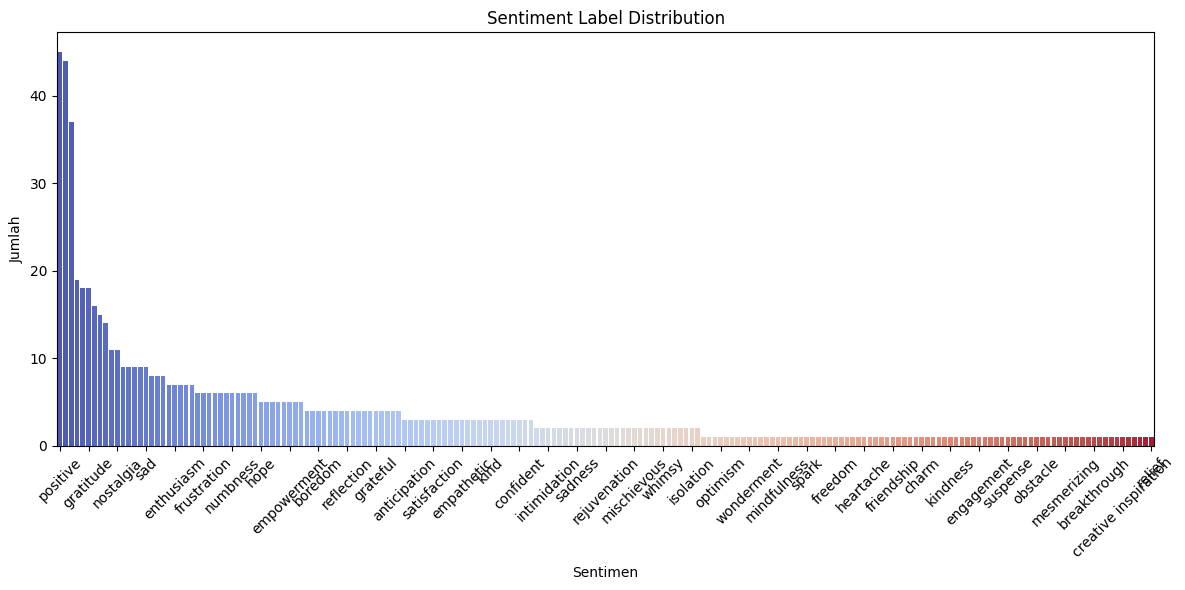

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Sentiment'] = data['Sentiment'].str.strip()

sentiment_counts = data['Sentiment'].value_counts()

colors = sns.color_palette("coolwarm", n_colors=len(sentiment_counts))

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Sentiment', order=sentiment_counts.index, palette=colors)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')


labels = sentiment_counts.index.tolist()
interval = 5
xtick_positions = list(range(0, len(labels), interval))
xtick_labels = [labels[i] for i in xtick_positions]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45)

plt.tight_layout()
plt.show()
